## 1. Meng-Import Library-Library yang akan Dibutuhkan

Sama seperti notebook pertama dalam menganalisis data peminjaman/penggunaan sepeda pada Perusahaan GowesKuyy, sebagai seorang Data Analyst saya harus mempersiapkan beberapa library yang akan dibutuhkan selama proses analisa berlangsung. Tetapi terdapat perbedaan antara notebook pertama dan notebook ini yaitu jika pada notebook pertama, tujuan atau hasil output-nya adalah melakukan proses pembersihan dan transformasi data serta memvisualisasikan data dengan grafik-grafik visual, pada notebook ini saya akan berfokus dalam membuat sebuah dashboard visual sederhana menggunakan Library Streamlit.

Streamlit merupakan sebuah library untuk Bahasa Pemrograman Python yang bersifat open-source dan free access yang bertujuan untuk membuat dashboard visualsiasi sederhana dan membagikan insight yang ditemukan melalui aplikasi berbasis website. Maka dari itu library-library yang akan saya butuhkan di dalam notebook kedua ini diantaranya adalah Pandas, Seaborn, Matplotlib, Streamlit serta modul yang bernama babel.number.

In [1]:
# Mendeklarasikan kembali library-library yang akan dibutuhkan selama proses pembuatan Dashboard visual sederhana di Streamlit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
plt.style.use("ggplot")

## 2. Load Dataset "main_data.xlsx"

In [2]:
# Load file dataset yang sebelumnya telah di-export ke dalam format file Microsoft Excel (.XLSX)
df_dashboard = pd.read_excel("main_data.xlsx")
df_dashboard.tail(4)

,Rental_Date,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temperature,Average_Temperature,Humidity,Windspeed,Casual,Registered,Total,Rental_Day
727,2012-12-28,Spring,2012,December,0,5,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,2012-12-29,Spring,2012,December,0,6,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,2012-12-30,Spring,2012,December,0,0,Weekend/Holiday,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796,30
730,2012-12-31,Spring,2012,December,0,1,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.215833,0.223487,0.577500,0.154846,439,2290,2729,31


Setelah melakukan proses load dataset yang pada notebook pertama telah dibersihkan serta data yang invalid telah ditransformasikan menjadi format data yang sesuai, maka selanjutnya saya akan berfokus dalam membuat dashboard visual sederhana menggunakan library streamlit berdasarkan tiga pertanyaan yang sudah saya jawab menggunakan grafik visual.

Tahap pembuatan dashboard visual sederhana menggunakan streamlit akan terbagi menjadi 2 fokus utama yaitu membuat sidebar serta dan membuat isi konten menggunakan visualisasi-visualisasi yang sudah saya buat pada notebook pertama beserta analisisnya. Khusus untuk sidebar akan terdapat beberapa elemen utama dari basic widgets yang terdiri dari input widget yakni data filter dan button widgets yakni selectbox dan multi-select. Tetapi sebelum membuat struktur dashboard dengan Library Streamlit, saya akan membuat beberapa helper function untuk memudahkan proses pembuatan data visualisasi di dalam dashboard visual sederhana dengan Library Streamlit.

## 3. Membuat Helper Function

Tujuan utama dari pembuatan helper function yang saya inisialisasikan ini adalah untuk digunakan sebagai visual cards yang akan menunjukkan jumlah nilai dari masing-masing atribut seperti jumlah pengguna yang terdaftar di dalam sistem dari Perusahaan GowesKuyy, jumlah pengguna yang tidak terdaftar di dalam sistem, dan lainnya.

In [3]:
# Membuat sebuah fungsi yang bertujuan untuk menghitung jumlah data yang unik dari atribut kolom "Season" 
def unique_number_of_rental_day(df_dashboard):
    data_unique_number_rental_day = df_dashboard["Rental_Day"].count()
    
    return data_unique_number_rental_day

In [4]:
# Membuat sebuah fungsi yang bertujuan untuk menghitung jumlah data yang unik dari atribut kolom "Season" 
def count_of_season(df_dashboard):
    count_of_season_four_categories = df_dashboard["Season"].nunique()
    
    return count_of_season_four_categories

In [5]:
# Menghitung jumlah total pengguna/peminjam sepeda yang tidak terdaftar di dalam sistem otomatis milik Perusahaan GowesKuyy
def create_total_casual_users(df_dashboard):
    sum_of_total_casual_users = df_dashboard["Casual"].sum()
    
    return sum_of_total_casual_users

In [6]:
# Menghitung jumlah total pengguna/peminjam sepeda yang terdaftar di dalam sistem otomatis milik Perusahaan GowesKuyy
def create_total_registered_users(df_dashboard):
    sum_of_total_registered_users = df_dashboard["Registered"].sum()
    
    return sum_of_total_registered_users

In [7]:
# Membuat sebuah fungsi yang bertujuan untuk menghitung jumlah total keseluruhan dari pengguna/peminjam sepeda,
# baik pengguna yang terdaftar (registered) maupun pengguna yang tidak terdaftar (casual)
def create_total_users(df_dashboard):
    sum_of_total_users = df_dashboard["Total"].sum()
    
    return sum_of_total_users

Setelah melakukan proses inisialisasi helper function sederhana, selanjutnya saya akan berfokus untuk membuat tampilan dari dashboard sederhana menggunakan Library Streamlit yang nantinya akan terdiri dari beberapa struktur aplikasi seperti layout yang akan terdiri dari kolom dan tabs, sidebar dan filter.

## 4. Pembuatan Dashboard Visual Sederhana menggunakan Streamlit

### 4.1. Change Favicon and Title Website for Visual Dashboard App + Create Header Dashboard

In [8]:
# Mengubah judul website yang akan kita buat beserta logo streamlit agar formatnya tidak default
st.set_page_config(page_title="Bike Sharing Dashboard", page_icon="🚲", layout="wide")

# Membuat header dashboard agar tampilan layout dashboard visual yang saya buat tidak membosankan
st.header("Submission Dashboard Visuals Bike Sharing 🚲 📊")

2023-12-23 23:15:00.111 
  command:

    streamlit run C:\Users\ekapr\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

Setelah mengubah icon pada tampilan dashboard, mengubah judul website yang tertera pada page website serta membuat header/judul untuk aplikasi dashboard visual yang bernama "Submission Dashboard Visuals Bike Sharing", selanjutnya saya akan memulai dalam membuat struktur layout dashboard yang akan terdiri dari 3 elemen utama yaitu Sidebar, Columns dan Tabs.

Elemen sidebar bertujuan untuk menampung fitur filtering data sehingga data yang tersedia dapat disesuaikan berdasarkan filter yang dibuat. Lalu pada elemen columns bertujuan untuk menampung kelima visual cards yang di mana data-datanya didasari oleh kelima helper function yang sudah dibuat sebelumnya. Itu berarti data yang ditampilkan oleh visual cards berasal dari kelima helper function yang nantinya data tersebut akan di-trigger oleh fitur filter. Sehingga jika user memilih filter Season yaitu "Spring", maka data yang ditampilkan pada kelima elemen column berasal dari data yang memiliki Season "Spring".

Terakhir adalah elemen tabs yang akan menampilkan grafik-grafik visualisasi berdasarkan 3 pertanyaan yang sudah dibuat pada notebook pertama. Tetapi sayangnya sifat dari grafik visualisasi ini tidak dinamis melainkan bersifat statis.

### 4.2. Create Layouts (Sidebar, Columns, Tabs)

#### 4.2.1. Layout Sidebar

In [9]:
# Membuat sebuah fitur sidebar di dalam Streamlit Dashboard App untuk menampung data filter yang akan dibuat
# berdasarkan beberapa atribut kolom dari DataFrame sehingga dashboard yang dibuat akan menjadi lebih interaktif
 
with st.sidebar:
    # Menampilkan logo perusahaan GowesKuyy yang bergerak dibidang jasa peminjaman sepeda
    st.image("https://cdn.pixabay.com/photo/2013/07/12/13/24/bicycle-146960_960_720.png")
    
    
    # Membuat sebuah multi-select widget yang bertujuan untuk pemilihan tanggal peminjaman
    # sehingga data tampil hanya data berdasarkan tanggal yang dipilih saja
    day_bike_sharing = df_dashboard["Rental_Day"].unique()
    day_multi_selected = st.multiselect("Select the Day: ", day_bike_sharing,
                                        placeholder="Select an option...")
    
    
    # Membuat sebuah multi-select widget yang bertujuan untuk menampilkan bulan penggunaan sepeda pinjaman
    month_bike_sharing = df_dashboard["Month"].unique()
    month_multi_selected = st.multiselect("Select the Month: ", month_bike_sharing,
                                          placeholder="Select an option...")
    
    
    # Membuat sebuah filter widget berdasarkan atribut kolom "Year" agar user dapat memfilter tahun peminjaman/penggunaan sepeda
    year_bike_sharing = df_dashboard["Year"].unique()
    year_selected = st.selectbox("Select the Year: ", year_bike_sharing,
                                 placeholder="Select an option...")
    
    
    # Membuat sebuah filter berdasarkan sehingga salah satu dari keempat kategori musim dapat dipilih oleh user
    season_bike_sharing = df_dashboard["Season"].unique()
    season_selected = st.multiselect("Select the Season:", season_bike_sharing,
                                     placeholder="Select an option...")

Berdasarkan script diatas saya telah berhasil membuat sebuah sidebar pada aplikasi dashboard visualisasi yang berisikan 4 fungsi filter yaitu filter yang berasal dari tanggal penggunaan/peminjaman sepeda, bulan peminjaman sepeda, tahun peminjaman sepeda serta musim ketika para pengguna meminjam/menggunakan sepeda yang didasari pada keempat kategori musim diantaranya adalah Musim Semi (Spring Season), Musim Panas (Summer Season), Musim Gugur (Fall/Autumn Season) dan Musim Dingin (Winter Season).

Adanya fitur filter yang diletakkan pada sidebar website dashboard visualisasi ini diharapkan agar dapat memudahkan user dan membuat dashboard yang saya buat menjadi lebih interaktif dan menyesuaikan keinginan user dalam menampilkan informasi yang ingin dilihatnya. Tetapi sejujurnya filter-filter tersebut masih belum dapat digunakan atau dengan kata lain fungsionalitas keempat filter tersebut masih belum berguna. Maka dari itu selanjutnya saya akan membuat sebuah query yang dimana keempat filter diatas dapat digunakan dan menyesuaikan informasi yang ingin ditampilkan oleh user.

In [10]:
# Memanggil variabel-variabel filter yang telah diinisialisasikan sebelumnya untuk diterapkan kepada setiap grafik visualisasi
df_multi_filter_selection = df_dashboard.query(
    "Rental_Day == @day_multi_selected & Month == @month_multi_selected & Year == @year_selected & Season == @season_selected")

Setelah berhasil memanggil keempat filter agar keempat filter yang telah dibuat di dalam sidebar dapat digunakan, selanjutnya saya akan mengimlementasikan tugas dari keempat filter tersebut ke dalam lima fungsi yang sudah saya buat pada tahapan "Pembuatan Helper Function". Hal ini supaya visual cards yang saya buat akan dipengaruhi oleh keempat filter yang sudah saya buat yaitu filter untuk tanggal peminjaman sepeda, filter untuk bulan peminjaman sepeda, filter untuk tahun peminjaman sepeda dan terakhir adalah filter berdasarkan musim/season dari setiap tahun dan bulannya.

In [11]:
# Menjadikan kelima helper function yang akan menjadi visual cards dapat dipengaruhi oleh filter yang ada di dalam dashboard
data_unique_number_rental_day = unique_number_of_rental_day(df_multi_filter_selection)
count_of_season_four_categories = count_of_season(df_multi_filter_selection)
sum_of_total_casual_users = create_total_casual_users(df_multi_filter_selection)
sum_of_total_registered_users = create_total_registered_users(df_multi_filter_selection)
sum_of_total_users = create_total_users(df_multi_filter_selection)

#### 4.2. Layout Columns

Karena pada aplikasi dashboard sederhana yang saya buat ini memiliki 2 bagian layout berbeda yakni layout column dan layout tabs, maka pekerjaan pertama saya adalah membuat layout column terlebih dahulu yang akan diletakkan diatas layout tabs. Layout tabs sendiri akan berisikan 3 grafik visualisasi dari setiap pertanyaan bisnis yang sudah saya buat pada notebook pertama.

Layout column sendiri akan memiliki 5 visual cards serta nilai-nilai data dari setiap atribut kolom dalam bentuk DataFrame yang berfungsi untuk menunjukkan nilai dari setiap masing-masing jumlah berdasarkan kelima atribut kolom yaitu:

1. Visual cards pertama berfungsi untuk menunjukkan ada berapa banyak tanggal peminjaman yang akan ditampilkan di dalam DataFrame tetapi dengan catatan bahwasanya nilai datanya akan disesuaikan oleh fitur filter Bulan peminjaman/penggunaan sepeda beserta data-data pada fitur filter lainnya.
2. Card yang kedua berfungsi untuk menunjukkan ada berapa banyak kategori musim yang akan kita pilih pada fitur filter.
3. Card yang ketiga berfungsi untuk menunjukkan jumlah total nilai atas peminjam/pengguna sepeda yang tidak terdaftar (pengguna casual) pada sistem otomatis milik Perusahaan GowesKuyy.
4. Sama seperti pada visual card yang ketiga, visual card yang keempat ini juga bertujuan untuk menunjukkan jumlah total nilai pengguna sepeda namun yang membedakan adalah total nilai yang ditampilkan berasal dari pengguna/peminjam sepeda yang terdaftar di dalam sistem otomatis milik Perusahaan GowesKuyy (pengguna registered).
5. Visual card yang terakhir berfungsi untuk menunjukkan jumlah total nilai keseluruhan dari masing-masing pengguna/peminjam sepeda, baik pengguna yang terdaftar (pengguna registered) maupun pengguna yang tidak terdaftar di dalam sistem otomatis Perusahaan GowesKuyy (pengguna casual).

In [12]:
# Membuat sebuah fitur layout column untuk menunjukkan jumlah total nilai berdasarkan atribut yang sudah dibuat pada helper function
first_column, second_column, third_column, fourth_column, fifth_column = st.columns(5) # Mengdefinisikan 5 variabel layout column

# Layout column pertama berfungsi untuk menampilkan jumlah tanggal yang berhasil ditampilkan pada DataFrame atas filter tanggal
with first_column:
    count_of_unique_rental_day = data_unique_number_rental_day
    st.metric("Number of Rental Day", count_of_unique_rental_day)

# Layout column kedua berfungsi untuk menampilkan jumlah musim yang dipilih dari fitur filter serta yang berhasil ditampilkan pada DataFrame
with second_column:
    count_of_season = count_of_season_four_categories
    st.metric("Total Season", count_of_season)
    
# Layout column ketiga berfungsi untuk menampilkan jumlah total pengguna casual yang berhasil ditampilkan pada DataFrame
with third_column:
    total_casual_users = sum_of_total_casual_users.sum()
    st.metric("# Casual Users", total_casual_users)

# Layout column keempat berfungsi untuk menampilkan jumlah total pengguna registered yang berhasil ditampilkan pada DataFrame
with fourth_column:
    total_registered_users = sum_of_total_registered_users.sum()
    st.metric("# Registered Users", total_registered_users)
    
# Layout column kelima berfungsi untuk menampilkan jumlah total keseluruhan pengguna yang behasil ditampilkan pada DataFrame, baik pengguna casual & pengguna registered
with fifth_column:
    total_user = sum_of_total_users.sum()
    st.metric("Total Users", total_user)
    

# Menampilkan data pada DataFrame dengan catatan setiap data & atribut dipengaruhi oleh filter yang digunakan
st.dataframe(df_multi_filter_selection)

DeltaGenerator()

Setelah berhasil menyusun desain serta membuat layout columns untuk kelima helper function, selanjutnya saya akan membuat layout tabs yang berisikan 3 konten atau 3 grafik visualisasi berdasarkan tiga pertanyaan analisis yang sudah saya buat pada notebook sebelumnya.

#### 4.3. Layouts Tabs

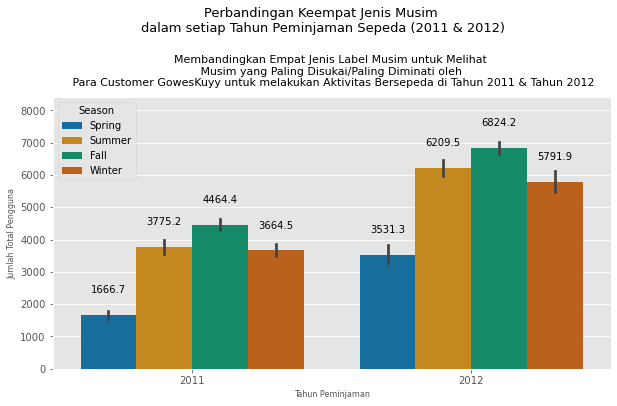

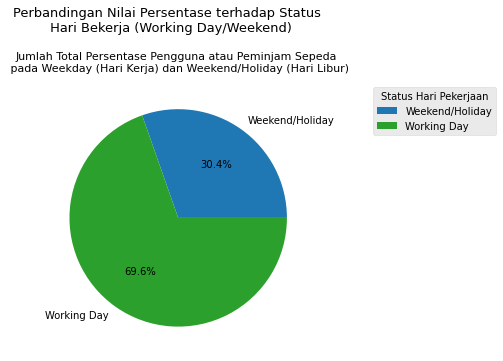

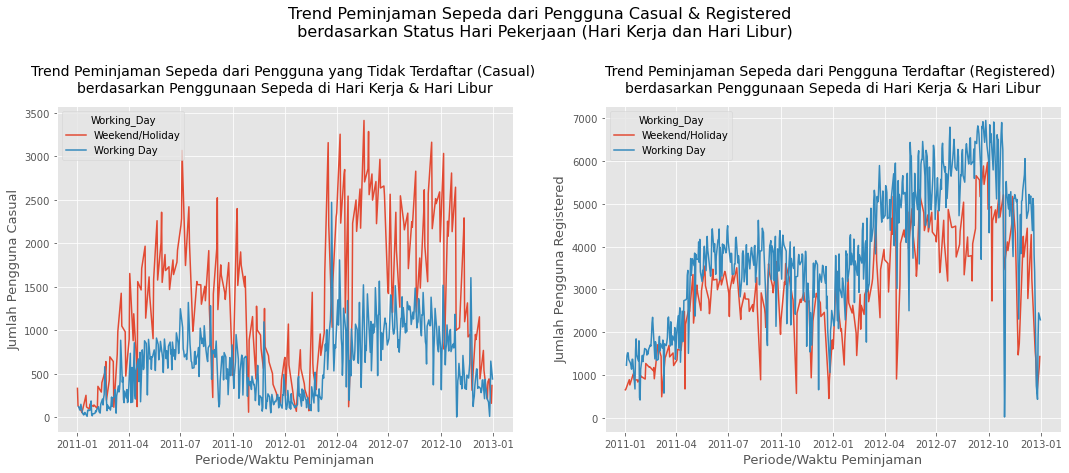

In [13]:
# Membuat struktur desain layout untuk ketiga pertanyaan analisis yang di mana masing-masing grafik
# visualisasi beserta analisis penjelasan dari setiap grafik akan diletakkan di dalam masing-masing page view/tabs
tab1, tab2, tab3 = st.tabs(["Question 1", "Question 2", "Question 3"])
 
with tab1:
    st.subheader("Pertanyaan 1: Bagaimana Tingkat Perbandingan Tahun Peminjaman Sepeda (2011 & 2012) berdasarkan Jumlah Total Keseluruhan Customer/Pengguna Sepeda Pinjaman (baik Jenis Customer Registered atau Customer Casual) dalam setiap masing-masing Musim?",
                 divider="gray")

    fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.barplot(x="Year", y="Total", hue="Season", data=df_dashboard, palette="colorblind",
                order=df_dashboard.groupby("Year")["Total"].sum().sort_values(ascending=True).index)
    fig.suptitle("Perbandingan Keempat Jenis Musim \n"
                 "dalam setiap Tahun Peminjaman Sepeda (2011 & 2012)", fontsize=13, y=1.13)
    ax.set_title("Membandingkan Empat Jenis Label Musim untuk Melihat \n "
                 "Musim yang Paling Disukai/Paling Diminati oleh \n "
                 "Para Customer GowesKuyy untuk melakukan Aktivitas Bersepeda di Tahun 2011 & Tahun 2012", fontsize=11, pad=11)
    ax.set_xlabel("Tahun Peminjaman", fontsize=8)
    ax.set_ylabel("Jumlah Total Pengguna", fontsize=8)
    
    for i in ax.containers:
        ax.bar_label(i, padding=20, fmt="%.1f")
        ax.margins(y=0.2)
    
    st.pyplot(fig)
    
    with st.expander("See Detail Explanation"):
        st.write(
            """
            Berdasarkan grafik batang diatas kita dapat mengetahui bahwasanya jika dikalkulasikan secara keseluruhan
            antara masing-masing jumlah total pengguna sepeda yang dimiliki oleh keempat label musim pada setiap tahun
            peminjaman, maka tahun 2012 merupakan tahun yang memiliki jumlah total peminjam terbanyak & tertinggi
            dibandingkan tahun 2011. Tetapi walaupun begitu, dari kedua tahun peminjaman tersebut,
            terdapat 1 persamaan yaitu musim gugur (fall/autumn season) adalah musim yang memiliki
            jumlah total pengguna/peminjam sepeda tertinggi diantara musim lainnya seperti musim semi (spring season),
            musim panas (summer season) dan musim dingin (winter season).
            
            Jumlah pengguna/peminjam sepeda selama musim gugur di tahun 2011 berjumlah 4.464 orang sedangkan jumlah pengguna
            sepeda yang menggunakan jasa peminjaman sepeda selama musim gugur di tahun 2012 berjumlah 6.824 orang.
            Artinya jika dilihat dari jumlah tersebut, sebuah jasa yang disediakan oleh Perusahaan GowesKuyy dari sisi
            peminjaman sepeda mengalami trend peningkatan jumlah pengguna karena berhasil mendapatkan
            sebanyak 2.360 pengguna/customer baru yang sebelumnya belum pernah menggunakan/memanfaatkan jasa peminjaman sepeda
            dari Perusahaan GowesKuyy.
            
            Berbicara tentang mendapatkan pengguna/customer baru dari sisi peminjaman sepeda, musim panas (summer season)
            berhasil mendapatkan jumlah customer baru yang paling banyak dibandingkan musim gugur dengan nilai
            total customer yang mencapai 2,434 pengguna. Hal tersebut dikarenakan jumlah total pengguna yang meminjam sepeda
            pada musim panas di tahun 2011 berjumlah 3.775 pengguna sedangkan pada tahun berikutnya (tahun 2012),
            jumlah total pengguna/customer yang meminjam sepeda dari Perusahaan GowesKuyy mencapai 6.209 pengguna.
            """
        )

with tab2:
    st.subheader("Pertanyaan 2: Bagaimanakah Perbandingan Tingkat Frekuensi Nilai Data berdasarkan Jumlah Persentase Peminjam/Pengguna Sepeda Disaat Hari Kerja dan Hari Libur?",
                 divider="gray")

    fig, ax = plt.subplots(figsize=(10, 5))
    
    percentage_working_day = df_dashboard.groupby("Working_Day")["Total"].sum().reset_index()
    plt.pie(percentage_working_day["Total"], labels = percentage_working_day["Working_Day"],
            colors=["tab:blue", "tab:green"], autopct = "%.1f%%")
    fig.suptitle("Perbandingan Nilai Persentase terhadap Status \n Hari Bekerja (Working Day/Weekend)", fontsize=13, y=1.09)
    ax.set_title("Jumlah Total Persentase Pengguna atau Peminjam Sepeda \n "
                 "pada Weekday (Hari Kerja) dan Weekend/Holiday (Hari Libur)", fontsize=11, pad=11)
    plt.legend(title="Status Hari Pekerjaan", loc="upper left", bbox_to_anchor=(1.2, 1))
    
    st.pyplot(fig)
    
    with st.expander("See Detail Explanation"):
        st.write(
            """
            Berdasarkan grafik pie diatas dapat diketahui jika penggunaan/peminjaman sepeda lebih banyak dilakukan
            pada saat hari kerja (weekday) yang dimulai dari hari Senin - Jumat dengan nilai persentase yaitu 69.6%.
            Sedangkan peminjaman sepeda yang dilakukan pada saat hari libur/akhir pekan jumlah penggunanya tidak sebanyak
            pengguna yang meminjam sepeda saat hari kerja karena nilai persentase yang dihasilkan hanya berjumlah 30.4%.
            
            Hal tersebut sudah sangat membuktikkan bahwasanya para pekerja atau bahkan pelajar sekolah serta
            mahasiswa/mahasiswi dalam melakukan aktivitas keberagkatan/kepulangan dari aktivitas mereka
            seperti bekerja/sekolah, mereka hampir selalu menaiki sepeda. Kenapa begitu? Karena dengan asumsi yang sudah saya
            jelaskan sebelumnya lalu jika kita selaraskan dengan informasi pada grafik pie diatas,
            maka dapat diketahui secara pasti bahwasanya intensitas jumlah pengguna/peminjam sepeda pada
            hari kerja (working day) sangat tinggi & banyak dibandingkan dengan pengguna sepeda pada hari libur kerja/sekolah.
            Itu berarti mayoritas background dari pengguna/peminjam sepeda berasal dari kalangan pekerja/anak sekolahan
            serta para mahasiswa & mahasiswi karena mayoritas aktivitas mereka dilakukan di hari Senin - Jumat yang merupakan
            hari bekerja (working day).
            
            Sedangkan untuk pengguna/peminjam sepeda yang menggunakan sepeda pada saat hari libur/weekend,
            saya berasumsi kalau mereka hanya sekedar ingin menikmati suasana kota disaat sedang libur bekerja/bersekolah.
            """
        )

with tab3:
    st.subheader("Pertanyaan 3: Bagaimanakah Trend Data Time-Series terhadap Penggunaan/Peminjaman Sepeda yang Dilakukan oleh Kedua Jenis Customer (Customer Registered & Customer Casual) pada Periode Waktu Peminjaman berdasarkan Hari Kerja (Working Day) dan Hari Libur (Weekend/Holiday)?",
                 divider="gray")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.suptitle("Trend Peminjaman Sepeda dari Pengguna Casual & Registered \n "
                 "berdasarkan Status Hari Pekerjaan (Hari Kerja dan Hari Libur)", fontsize=16, y=1.11)
    
    sns.lineplot(x="Rental_Date", y="Casual", hue="Working_Day", data=df_dashboard, ax=ax[0])
    ax[0].set_title("Trend Peminjaman Sepeda dari Pengguna yang Tidak Terdaftar (Casual) \n"
                    "berdasarkan Penggunaan Sepeda di Hari Kerja & Hari Libur", fontsize=14, pad=14)
    ax[0].set_ylabel("Jumlah Pengguna Casual", fontsize=13)
    ax[0].set_xlabel("Periode/Waktu Peminjaman", fontsize=13)
    
    sns.lineplot(x="Rental_Date", y="Registered", hue="Working_Day", data=df_dashboard, ax=ax[1])
    ax[1].set_title("Trend Peminjaman Sepeda dari Pengguna Terdaftar (Registered) \n"
                    "berdasarkan Penggunaan Sepeda di Hari Kerja & Hari Libur", fontsize=14, pad=14)
    ax[1].set_ylabel("Jumlah Pengguna Registered", fontsize=13)
    ax[1].set_xlabel("Periode/Waktu Peminjaman", fontsize=13)
    
    st.pyplot(fig)
    
    with st.expander("See Detail Explanation"):
        st.write(
            """
            Hasil dari kedua line chart diatas memberikan kita informasi bahwasanya dalam periode waktu
            selama 2 tahun (1 Januari 2011 hingga 31 Desember 2012) selalu mengalami peningkatan jumlah pengguna secara
            signifikan, baik itu pengguna casual maupun pengguna yang terdaftar di dalam sistem otomatis Perusahaan GowesKuyy.
            Walaupun sebenarnya di dalam line chart yang menampilkan trend peminjaman sepeda untuk customer casual
            terdapat penurunan jumlah pengguna yang dimulai dari akhir tahun 2011 (Desember 2011) sampai meningkat kembali
            pada periode akhir Bulan Maret 2012. Selain itu, insight yang dapat kita ketahui selanjutnya dari line
            chart yang menampilkan trend peminjaman sepeda untuk pengguna casual adalah bahwasanya jumlah
            pengguna yang meminjam sepeda saat hari libur atau akhir pekan (weekend/holiday) ternyata jauh lebih banyak
            kuantitasnya daripada jumlah pengguna yang meminjam sepeda saat hari kerja/sekolah (working day).
            Hal tersebut dapat kita lihat secara jelas dari garis biru yang menunjukkan trend peningkatan serta penurunan
            jumlah penggunaan sepeda saat hari kerja.
            
            Di samping itu, jika kita melihat trend penggunaan sepeda yang dilakukan oleh para pengguna yang terdaftar
            di dalam sistem (registered user) bahwasanya antara peminjaman/penggunaan sepeda saat
            hari kerja (Senin - Jumat) dan hari libur/akhir pekan sangat selaras antar kedua label tersebut.
            Tetapi walaupun begitu penggunaan sepeda saat hari kerja/sekolah masih lebih banyak penggunanya daripada penggunaan
            sepeda saat hari libur/pada akhir pekan walaupun selisih jumlahnya tidak kontras seperti selisih jumlah pengguna
            antara penggunaan sepeda pinjaman saat hari kerja & hari libur di grafik trend peminjaman
            sepeda untuk customer/pengguna casual.
            """
        )